# Automatyzacja procesów projektowania z wykorzystaniem Pythona
Temat Projektu: Obliczenie przepływu Poisseuile'a w Pythonie dla płynu nienewtonowskiego:
  - wizualizacja wyników,
  - porównanie z rozwiązaniem dla płynu liniowego,
  - serializacja wyników

Wiedzę na temet przepływu Poisseulie'a nienewtonowskiego płynu opieram na 
https://www.whoi.edu/cms/files/lecture03_28327.pdf

In [1]:
# import niezbędnych bibliotek 

import numpy as np
import matplotlib.pyplot as plt 
import msgpack


In [3]:
# Klasa obierająca przy inicjacji parametry rury i przepływu 

class PipeFlow():

    def __init__(self,R,L,delta_p,k,n,compute_flow):
        self.Radius = R
        self.Length = L
        self.pressure_dif = delta_p
        self.k_const = k
        self.n_const = n

        self.D_linspace = np.linspace(-R,R,101)
        self.poisseulie_nn = np.array
        self.poisseulie_n = np.array

        if compute_flow == True:
            self.poisseulie_nn = self.poisseulie_flow(n)
            self.poisseulie_n = self.poisseulie_flow(1)

    
    def poisseulie_flow(self,n):
        # n = 1 - newtonian fluid
        # n < 1 - non newtonian fluid
        n = n
        gamma_w = self.pressure_dif*self.Radius/(2*self.Length)
        w = ((gamma_w/(self.k_const*self.Radius))**(1/n))*(self.Radius**(1+(1/n)) - abs(self.D_linspace)**(1+(1/n)))/(1/n +1)
        return w
    
    def visualise(self):
        plt.plot(self.poisseulie_n, self.D_linspace, color='r', label='newtonian')
        plt.plot(self.poisseulie_nn, self.D_linspace, color='g', label='non newtonian')
        plt.xlabel("Pipe Length")
        plt.ylabel("Pipe Width")    
        plt.title("Poisseulie flow profiles for newtonian and non newtonian fluids")
        plt.legend()
        plt.show()

Wizualizacja przepływu dla pojedyńczego przypadku

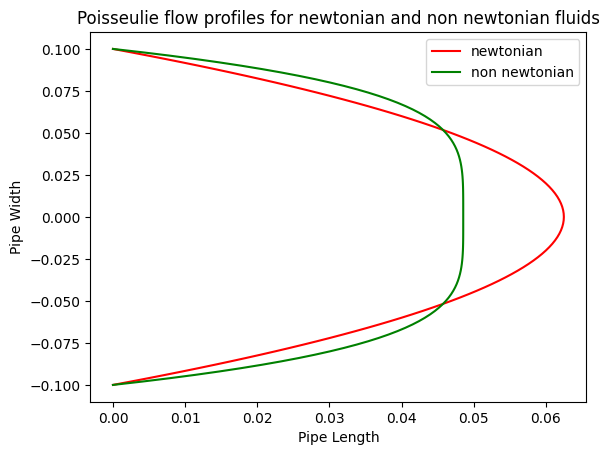

In [4]:
Flow_1 = PipeFlow(0.1,2,10**3,20,0.3,True)
Flow_1.visualise()

Tworze funkcje służące do serializacji enkodującą i dekodującą 

In [9]:
def enc(obj):
    if type(obj) == PipeFlow: # make sure obj is of some type
        code = 1 # A flag determining the type
        # pack and return
        return msgpack.ExtType(code, msgpack.packb([obj.Radius, obj.Length, obj.pressure_dif, obj.k_const, obj.n_const,
                                                    obj.poisseulie_n.tobytes(),obj.poisseulie_nn.tobytes()]))
    raise TypeError # Rise an error if type not handled

def dnc(code, data):
    if code == 1: # a flag determining the type
        # call the unpack on the data passed in here
        Radius, Length, pressure_dif, k_const,n_const,poisseulie_n,poisseulie_nn = msgpack.unpackb(data)
        
        # make the object
        c = PipeFlow(Radius, Length, pressure_dif, k_const,n_const,False)  
        
        c.poisseulie_n = np.frombuffer(poisseulie_n)      
        c.poisseulie_nn = np.frombuffer(poisseulie_nn)  
        
        # return the object outside
        return c
    # in case the type is either a build in or other
    return msgpack.ExtType(code, data)

Tworze przykładowy zbiór danych tworzący profile przepływów dla parametru 'n' z przedziału (0.01-0.99)

In [10]:
N = (np.arange(1,100)/100).tolist()
flow_list = []
for n in N:
    Flow = PipeFlow(0.1,2,10**3,20,n,True)
    flow_list.append(Flow)

Serializuje dane 

In [13]:
msgpack.dump(flow_list, open( 'serialized.dat', "wb" ), default=enc)


Odkodowuje dane

In [14]:
new_list = msgpack.load(open( 'serialized.dat', "rb" ), ext_hook=dnc)

Tworze wizualizacje jednego z przepływów 

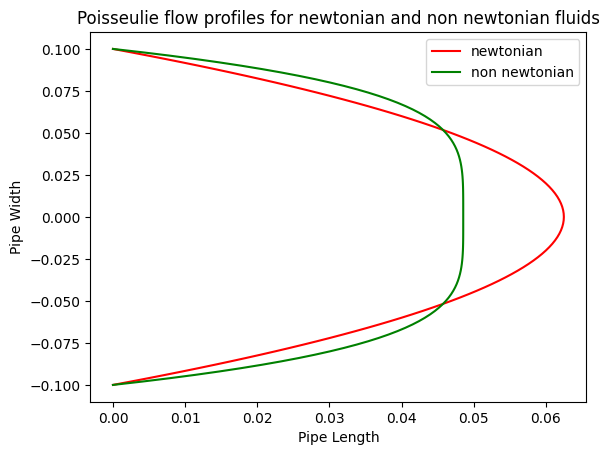

In [15]:
new_list[29].visualise()